In [1]:
import pdb
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import Distributions.nhanes as nhanes

%matplotlib notebook

/home/mohammad/anaconda3/envs/olenv/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
TASK = 'heart'#'heart', 'diabetes'
DATA_PATH = '/home/mohammad/Database/CDC/NHANES/'

nhanes_dataset = nhanes.NHANES(DATA_PATH, None)
nhanes_dataset.index(False)
if TASK == 'diabetes':
    MISSING_THRESHOLD = 0.10#0.10
    MUINFO_THRESHOLD = 0.010#0.01#0.005:81#0.01:78
    target_col = 'LBXGLU'
    exclude_cols = [target_col, 'LBDSGLSI', 'LBXSGL', 'LBDGLUSI', 'LBXGLUSI', 'LBXGH', 'LBXMC']#, 'DIQ010']
    include_cols = None#['RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'RIDRETH1', 'INDHHINC', 'DMDEDUC2', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BPXSY3', 'BPXDI3', 'BPXSY4', 'BPXDI4', 'BMXBMI', 'BMXWAIST', 'BMXHT', 'BMXLEG', 'BMXWT', 'LBXTC', 'LBXTR', 'LBXFB', 'LBDLDL', 'ALQ101', 'ALQ120Q', 'PAQ605', 'PAQ620', 'PAQ180', 'SLD010H', 'SMQ020', 'SMD030', 'MCQ250A', 'BPQ020']
    nhanes_dataset.process_supervised(target_col, exclude_cols, include_cols,
                                  nhanes.preproc_cut, [0, 100, 125, 1000], 
                                  #nhanes.preproc_cut, [0, 100, 1000],
                                  MISSING_THRESHOLD, MUINFO_THRESHOLD)
elif TASK == 'heart':
    MISSING_THRESHOLD = 0.05 #0.25
    MUINFO_THRESHOLD = 0.0 #0.0
    target_col = ['MCQ160B', 'MCQ160C','MCQ160E','MCQ160F']
    exclude_cols = target_col + ['MCQ180B', 'MCQ180C', 'MCQ180E', 'MCQ180F']
    include_cols = None
    def fn_any(df_cols, threshold):
        return (df_cols < threshold).any(axis=1).astype(np.int)
    nhanes_dataset.process_supervised(target_col, exclude_cols, include_cols,
                                  fn_any, 1.5, 
                                  MISSING_THRESHOLD, MUINFO_THRESHOLD)

Loading from cache: /home/mohammad/Database/CDC/NHANES/cache/index_cache.pkl


In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    pass# print(nhanes_dataset.df_features.describe())
print(nhanes_dataset.df_features.columns)
nhanes_dataset.df_features.shape

Index(['PHDSESN#5.397605346934028e-79', 'PHDSESN#1.0', 'PHDSESN#2.0',
       'SDDSRVYR#1.0', 'SDDSRVYR#2.0', 'SDDSRVYR#3.0', 'SDDSRVYR#4.0',
       'SDDSRVYR#5.0', 'SDDSRVYR#6.0', 'SDDSRVYR#7.0',
       ...
       'HUQ030#3.0', 'HUQ030#9.0', 'HUQ090#1.0', 'HUQ090#2.0', 'HUQ090#7.0',
       'HUQ090#9.0', 'PFQ090#1.0', 'PFQ090#2.0', 'PFQ090#7.0', 'PFQ090#9.0'],
      dtype='object', length=308)


(49509, 308)

In [4]:
nhanes_dataset.save_supervised('./run_data/nhanes/{}_tmp.pkl'.format(TASK))

In [5]:
dist = nhanes_dataset.get_distribution('test')
#dist.__next__()  

In [6]:
features_trn, targets_trn = nhanes_dataset.get_batch(n_size=5000, phase='train', balanced=True)
features_tst, targets_tst = nhanes_dataset.get_batch(n_size=200, phase='test', balanced=True)

#clf = SVC()
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(features_trn, targets_trn)
preds_tst = clf.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_RFC', accu)

clf = SVC()
clf.fit(features_trn, targets_trn)
preds_tst = clf.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_SVC', accu)

clf = LogisticRegression()
clf.fit(features_trn, targets_trn)
preds_tst = clf.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR', accu)

/home/mohammad/Dropbox/Work/Opportunistic/OpportunisticLearning/Distributions/nhanes.py:311: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  dataset_features = self.df_features.as_matrix()
/home/mohammad/Dropbox/Work/Opportunistic/OpportunisticLearning/Distributions/nhanes.py:312: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  dataset_targets = self.df_targets.as_matrix()


accu_tst_RFC 0.85
accu_tst_SVC 0.835
accu_tst_LR 0.835


In [7]:
(targets_trn==1).mean()

(nhanes_dataset.df_targets == 0).mean()

0.8945242279181563

Index(['MCQ160D#2.0', 'MCQ160D#9.0', 'HUQ010#1.0', 'HUQ010#5.0',
       'SDMVSTRA#89.0', 'RIDAGEYR', 'SDMVSTRA#47.0', 'SDMVSTRA#20.0',
       'MCQ160D#1.0', 'BPQ020#1.0',
       ...
       'HUQ020#7.0', 'DIQ010#7.0', 'DIQ050#7.0', 'DIQ050#9.0', 'MCQ220#7.0',
       'MCQ053#7.0', 'MCQ160L#7.0', 'MCQ160K#7.0', 'MCQ160G#7.0',
       'MCQ010#7.0'],
      dtype='object', length=308)


([array([5., 0., 0., 0., 0., 0., 0., 0., 0., 5.]),
  array([8.94524228, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 1.05475772])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

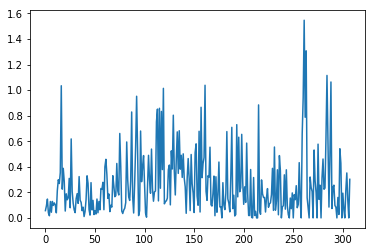

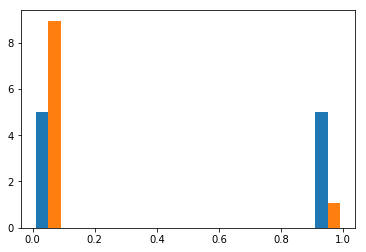

In [8]:
plt.figure()
plt.plot(np.abs(clf.coef_.T))

inds = np.argsort(np.sum(np.abs(clf.coef_.T), 1))[::-1]
print(nhanes_dataset.df_features.columns[inds])

plt.figure()
#plt.hist(nhanes_dataset.df_targets, density=True)
#plt.hist(targets_trn, density=True)

plt.hist([targets_trn,nhanes_dataset.df_targets], density=True, histtype='bar')


(27105, 1)

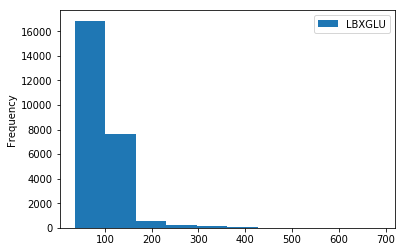

In [9]:
nhanes_dataset.column_data['LBXGLU'].plot.hist()
nhanes_dataset.column_data['LBXGLU'].shape

In [10]:
nhanes_dataset.column_data['LBXGLU'].isna().mean()

LBXGLU    0.060173
dtype: float64

In [11]:
(1-nhanes_dataset.column_data['LBXGLU'].isna().mean())*nhanes_dataset.column_data['LBXGLU'].shape[0]

LBXGLU    25474.0
dtype: float64